por Felipe Miyazato

In [1]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Atividade 63

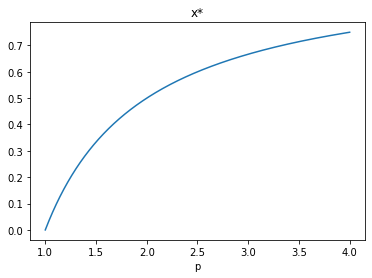

In [2]:
p = np.linspace(1, 4, num=1000)
fx = (p-1)/p

plt.plot(p,fx)
plt.title('x*')
plt.xlabel('p')
plt.show()

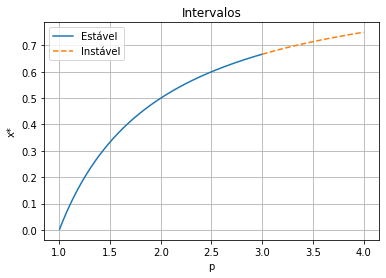

In [3]:
df_dx_x = p-2*p*fx

# 1) mask points where |df/dx|_x* < 1
fx_unstable = np.ma.masked_where(np.abs(df_dx_x) < 1, fx)

# 2) mask points where |df/dx|_x* >= 1
fx_stable = np.ma.masked_where(np.abs(df_dx_x) >= 1, fx)

plt.plot(p, fx_stable, '-', label='Estável')
plt.plot(p, fx_unstable, '--', label='Instável')
plt.legend()
plt.title('Intervalos')
plt.xlabel('p')
plt.ylabel('x*')
plt.grid()
plt.show()

# Atividade 64

\begin{align}
f^2(x) &= p \left( px - px^2 \right) - p \left( px - px^2 \right) ^2 \\
&= x (1 - x) \left( p^3 x^2 - p^3 x + p^2 \right)
\end{align}

no ponto fixo

$$ x^* = x^* (1 - x^*) \left( p^3 {x^*}^2 - p^3 x^* + p^2 \right) $$

cujas raízes são

$0$, $\frac{p-1}{p}$, $\frac{-\sqrt{p^2 -2p -3} +p +1}{2p}$ e $\frac{\sqrt{p^2 -2p -3} +p +1}{2p}$

para a derivada

\begin{align}
f^2(x) &= x (1 - x) \left( p^3 x^2 - p^3 x + p^2 \right) \\
\implies \frac{d}{dx} \left( f^2 (x) \right) &= -p^2 (2x - 1) \left( 2p (x-1) x + 1 \right)
\end{align}


# Atividade 65

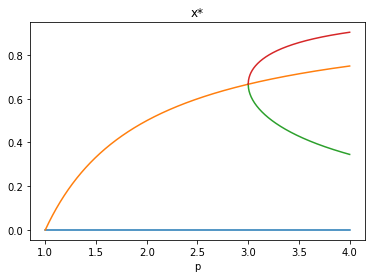

In [4]:
root_delta = np.sqrt(p**2-2*p-3)

x0 = np.zeros(p.size)
x1 = fx.copy()
x2 = (-root_delta+p+1)/(2*p)
x3 = (root_delta+p+1)/(2*p)

p = np.array([p]*4).T
f2x = np.array([x0,x1,x2,x3]).T

plt.plot(p,f2x)
plt.title('x*')
plt.xlabel('p')
plt.show()

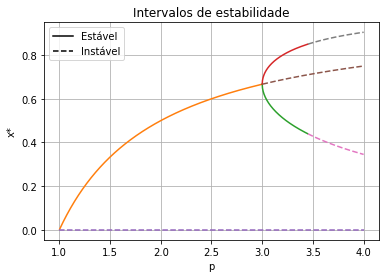

In [5]:
df2_dx_x = -p**2 *(2*f2x -1)*(2*p*(f2x -1)*f2x +1)

# 1) mask points where |df/dx|_x* < 1
fx_unstable = np.ma.masked_where(np.abs(df2_dx_x) < 1, f2x)

# 2) mask points where |df/dx|_x* >= 1
fx_stable = np.ma.masked_where(np.abs(df2_dx_x) >= 1, f2x)

custom_lines = [Line2D([0], [0], color='k'),
                Line2D([0], [0], color='k', linestyle='--')]

plt.plot(p, fx_stable, '-')
plt.plot(p, fx_unstable, '--')
plt.title('Intervalos de estabilidade')
plt.xlabel('p')
plt.ylabel('x*')
plt.grid()
plt.legend(custom_lines, ['Estável', 'Instável'])
plt.show()

# Atividade 66

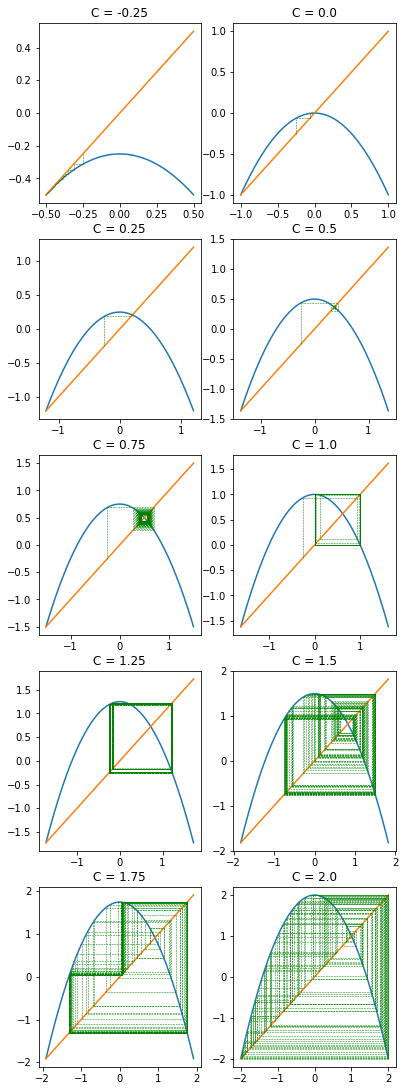

In [6]:
fig, ax = plt.subplots(5, 2, figsize=(6.4, 19.2))

def x_n1(xn, C): return C - xn**2

C = np.linspace(-.25,2,num=10)

for i in range(10):
    x_min = -((1+4*C[i])**(1/2) + 1)/2 
    x = np.linspace(x_min, -x_min)
    
    j = i//2
    k = i%2

    ax[j,k].plot(x, x_n1(x, C[i]))
    ax[j,k].plot(x, x)
    
    ax[j,k].set_title(f'C = {C[i]}')
    
    x1 = -.25
    for _ in range(128):
        x0 = x1
        x1 = x_n1(x0, C[i])
        ax[j,k].plot((x0,x0),(x0,x1), 'g--', linewidth=.5)
        ax[j,k].plot((x0,x1),(x1,x1), 'g--', linewidth=.5)

# Atividade 67

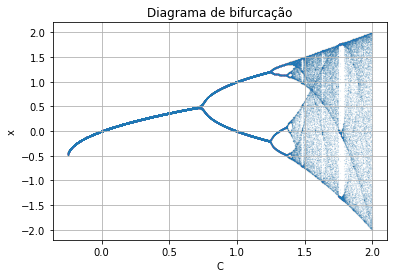

In [7]:
NT = N = 64

C = np.linspace(-.25,2,num=2250)

x = np.empty((NT+N+1, C.size))
x[0] = .25

for i in range(NT+N):
    x[i+1] = x_n1(x[i], C)
    
C_plot = np.full(x[-N:].shape, C)

plt.scatter(C_plot, x[-N:], s=.001)
plt.xlabel('C')
plt.ylabel('x')
plt.title('Diagrama de bifurcação')
plt.grid()
plt.show()

# Atividade 68

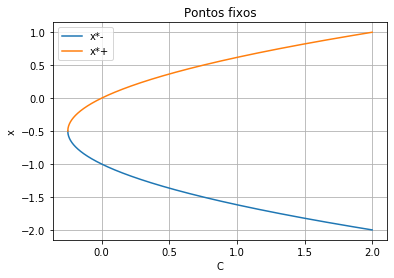

In [8]:
root_delta = (1+4*C)**(1/2)

root1 = (-1-root_delta)/2
root2 = (-1+root_delta)/2

plt.plot(C,root1,label='x*-')
plt.plot(C,root2,label='x*+')
plt.xlabel('C')
plt.ylabel('x')
plt.title('Pontos fixos')
plt.legend()
plt.grid()
plt.show()

# Atividade 69

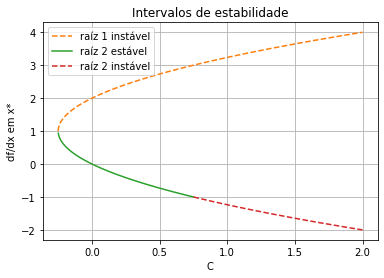

In [9]:
df_dx_root1 = -2*root1
df_dx_root2 = -2*root2

# 1) mask points where |df/dx|_x* < 1
df_dx_root1_unstable = np.ma.masked_where(np.abs(df_dx_root1) < 1, 
                                          df_dx_root1)
df_dx_root2_unstable = np.ma.masked_where(np.abs(df_dx_root2) < 1, 
                                          df_dx_root2)

# 2) mask points where |df/dx|_x* >= 1
df_dx_root1_stable = np.ma.masked_where(np.abs(df_dx_root1) >= 1, 
                                        df_dx_root1)
df_dx_root2_stable = np.ma.masked_where(np.abs(df_dx_root2) >= 1, 
                                        df_dx_root2)

plt.plot(C, df_dx_root1_stable, '-')
plt.plot(C, df_dx_root1_unstable, '--', label='raíz 1 instável')
plt.plot(C, df_dx_root2_stable, '-', label='raíz 2 estável')
plt.plot(C, df_dx_root2_unstable, '--', label='raíz 2 instável')
plt.title('Intervalos de estabilidade')
plt.xlabel('C')
plt.ylabel('df/dx em x*')
plt.grid()
plt.legend()
plt.show()

# Atividade 70

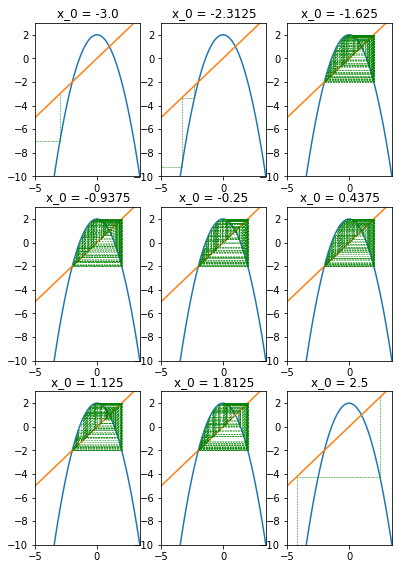

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(6.4, 9.6))

C = 2
x_min = -((1+4*C)**(1/2) + 1)/2 

xi = np.linspace(x_min-1, .5-x_min, num=9)

for i in range(9):
    x = np.linspace(x_min-3, 1.5-x_min)
    
    j = i//3
    k = i%3

    ax[j,k].plot(x, x_n1(x, C))
    ax[j,k].plot(x, x)
    ax[j,k].set_xlim(x_min-3, 1.5-x_min)
    ax[j,k].set_ylim(-10, 3)
    
    ax[j,k].set_title(f'x_0 = {round(xi[i],6)}')
    
    x1 = xi[i]
    for _ in range(128):
        x0 = x1
        x1 = x_n1(x0, C)
        ax[j,k].plot((x0,x0),(x0,x1), 'g--', linewidth=.5)
        ax[j,k].plot((x0,x1),(x1,x1), 'g--', linewidth=.5)

# Atividade 71

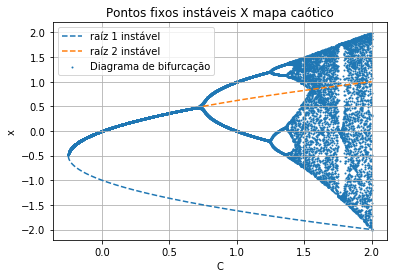

In [11]:
NT = N = 64

C = np.linspace(-.25,2,num=2250)

x = np.empty((NT+N+1, C.size))
x[0] = .25

for i in range(NT+N):
    x[i+1] = x_n1(x[i], C)
    
C_plot = np.full(x[-N:].shape, C)

# 1) mask points where |df/dx|_x* < 1
x_root1_unstable = np.ma.masked_where(np.abs(df_dx_root1) < 1, 
                                          root1)
x_root2_unstable = np.ma.masked_where(np.abs(df_dx_root2) < 1, 
                                          root2)

plt.plot(C, x_root1_unstable, '--', label='raíz 1 instável')
plt.plot(C, x_root2_unstable, '--', label='raíz 2 instável')

plt.scatter(C_plot[::7], x[-N::7], s=1, label='Diagrama de bifurcação')
plt.xlabel('C')
plt.ylabel('x')
plt.title('Pontos fixos instáveis X mapa caótico')
plt.grid()
plt.legend()
plt.show()

# Atividade 72

Partimos da expressão do mapa logístico

\begin{align}
px(1-x) &=  px^2 - px \\
&= px^2 - px -\frac{p}{4} +\frac{p}{4} \\
&= - \left( \sqrt{p} x - \frac{ \sqrt{p} }{2} \right) ^2 + \frac{p}{4}
\end{align}

Substituindo $y = \sqrt{p} x - \frac{ \sqrt{p} }{2}$ e $C = \frac{p}{4}$ resulta na expressão do mapa quadrático $C - y^2$

# Atividade 73

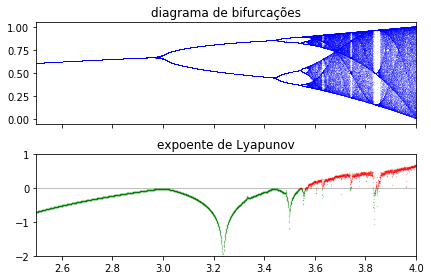

In [39]:
def logistic(r, x):
    return r * x * (1 - x)

n = 10001
r = np.linspace(1., 4., n)

iterations = 1000
x = .3 * np.ones(n)

lyapunov = np.zeros(n)

fig, (ax1, ax2) = plt.subplots(2, 1,sharex=True)
for i in range(NT+N):
    x = logistic(r, x)
    
    lyapunov += np.log(abs(r - 2 * r * x))
    
    if i >= (NT):
        ax1.plot(r, x, 'b,', alpha=.1)
ax1.set_xlim(2.5, 4)
ax1.set_title("diagrama de bifurcações")

ax2.axhline(0, color='k', lw=.5, alpha=.5)

ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / (NT+N),
         'g.', alpha=.5, ms=.5)

ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / (NT+N),
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("expoente de Lyapunov")
plt.tight_layout()

# Atividade 74

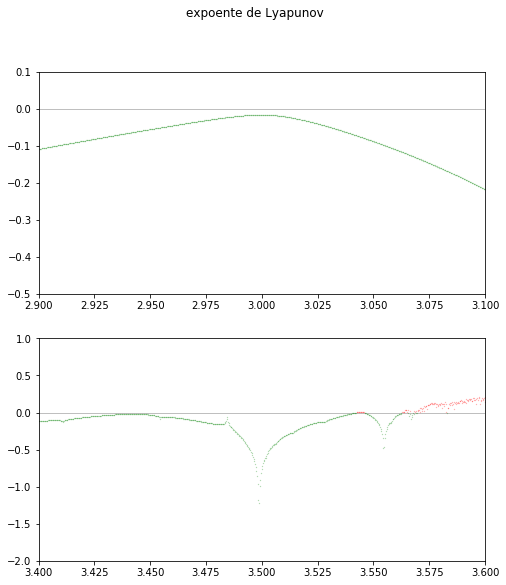

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.axhline(0, color='k', lw=.5, alpha=.5)

ax1.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / (NT+N),
         '.g', alpha=.5, ms=.5)

ax1.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / (NT+N),
         '.r', alpha=.5, ms=.5)
ax1.set_xlim(2.9, 3.1)
ax1.set_ylim(-.5, .1)

ax2.axhline(0, color='k', lw=.5, alpha=.5)

ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / (NT+N),
         '.g', alpha=.5, ms=.5)

ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / (NT+N),
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(3.4, 3.6)
ax2.set_ylim(-2, 1)

fig.suptitle("expoente de Lyapunov")
plt.show()